In [1]:
#!pip install xlrd
#!pip install openpyxl
#!pip install pandas
import numpy as np
import os
import zipfile
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageEnhance

## Data directory checker

In [2]:
image_root = './Images/'

train_path = os.path.join(image_root, 'Train')
val_path = os.path.join(image_root, 'Validation')
test_path = os.path.join(image_root, 'Test')

train_images, val_images, test_images = [], [], []

for image in os.listdir(train_path):
    if image[-3:] == 'png': train_images.append(image)

for image in os.listdir(val_path):
    if image[-3:] == 'png': val_images.append(image)
        
for image in os.listdir(test_path):
    if image[-3:] == 'png': test_images.append(image)        
    


print(len(train_images), len(val_images), len(test_images))

381 127 127


In [3]:
all_images = []
roots = [train_path, val_path, test_path]
for i, images in enumerate([train_images, val_images, test_images]):
    for image in images:
        image_path = os.path.join(roots[i],image)
        all_images.append(image_path)
print(len(all_images))

635


## Label distribution checker

In [26]:
stages = ['Train', 'Validation', 'Test']
labels = {}
labels['total'] = []
ages = []
for stage in stages:
    labels[stage] = []
    stage_image_root = os.path.join(image_root, stage)
    stage_images = os.listdir(stage_image_root)
    
    for image in stage_images:
        if image[-3:] == 'png':
            pt_no, age, label = image.split(' ')
            label = int(label.split('.png')[0][0])
            
            if label in [0,1]    : label = 0
            elif label in [2, 3] : label = 1
            
            labels[stage].append(label)
            labels['total'].append(label)
            ages.append(int(age))

In [8]:
128-67

61

In [9]:
np.array((labels['Train'])).sum(), np.array((labels['Validation'])).sum(), np.array((labels['Test'])).sum()

(206, 68, 67)

In [10]:
len(labels['total']), np.array(labels['total']).sum()

(635, 341)

In [11]:
(np.array(ages).mean() + np.array(ages).std(), np.array(ages).mean() - np.array(ages).std())

(79.02470138921419, 44.282385224959036)

In [12]:
np.array(ages).mean(), np.array(ages).std()

(61.653543307086615, 17.37115808212758)

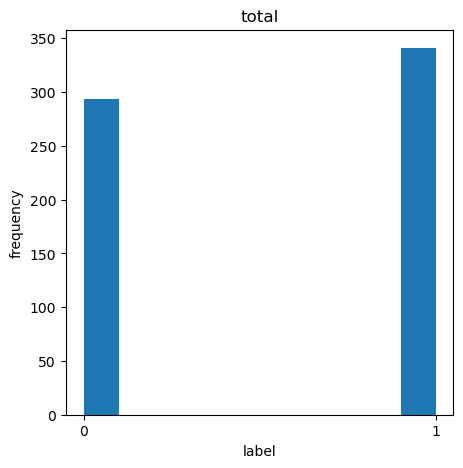

In [13]:
plt.figure(figsize = (5,5))

plt.title('total')
plt.hist(labels['total'])
plt.xticks([0,1])
plt.xlabel('label')
plt.ylabel('frequency')
plt.show()

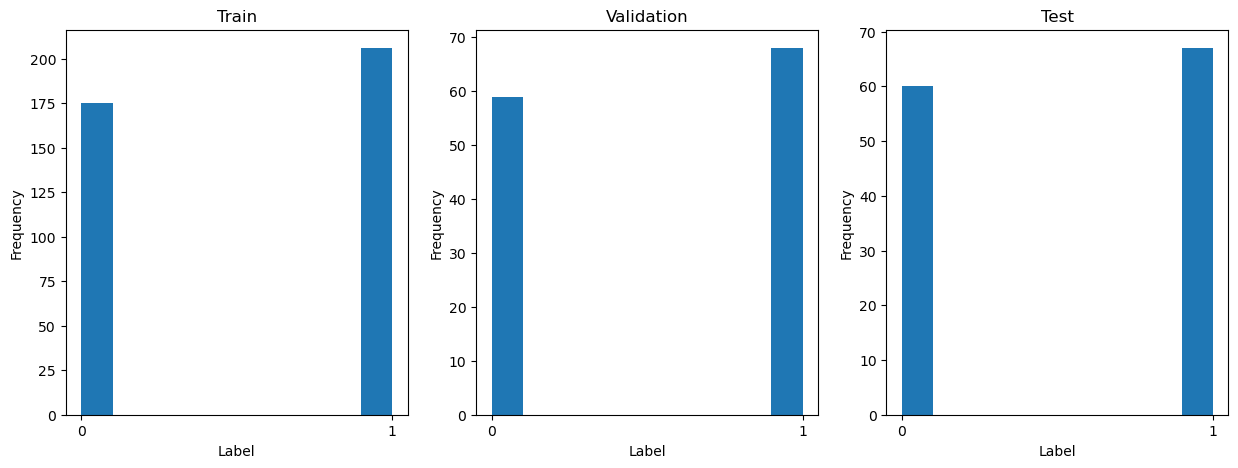

In [14]:
plt.figure(figsize = (15,5))

for i, stage in enumerate(stages):
    plt.subplot(1,3, i+1)
    plt.title(stage)
    plt.xticks([0,1])
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.hist(labels[stage])
plt.show()

In [15]:
ages = np.array(ages)
labels = np.array(labels['total'])

In [27]:
ages[labels==0]

84

In [30]:
(np.array(ages)<=50).sum()

128

In [22]:
(ages > 50).sum()

507

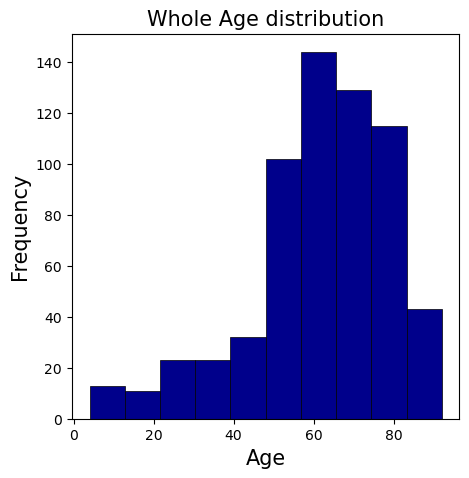

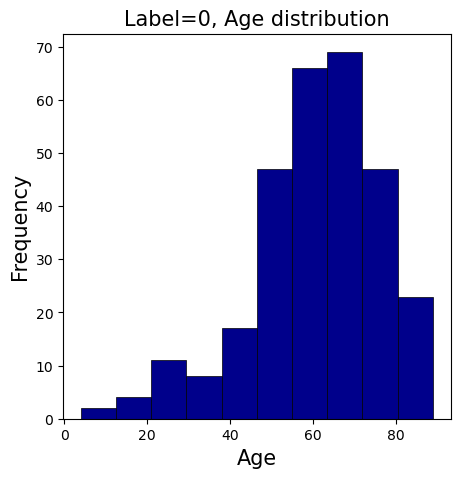

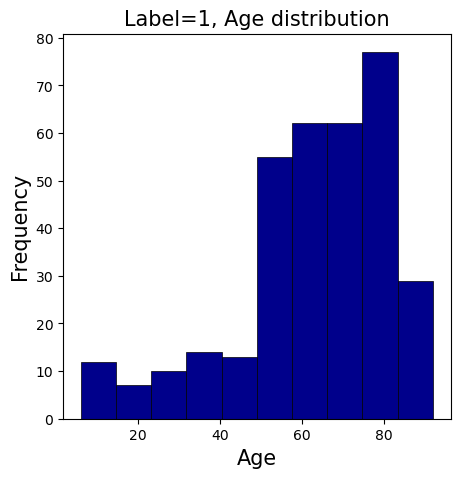

In [16]:
plt.figure(figsize=(5, 5))

plt.title('Whole Age distribution', size=15)
plt.hist(ages, color='darkblue', edgecolor='black', linewidth=0.5)  # 구분선 색상과 두께 설정

plt.xlabel('Age', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

plt.figure(figsize=(5, 5))

plt.title('Label=0, Age distribution', size=15)
plt.hist(ages[labels==0], color='darkblue', edgecolor='black', linewidth=0.5)  # 구분선 색상과 두께 설정

plt.xlabel('Age', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

plt.figure(figsize=(5, 5))

plt.title('Label=1, Age distribution', size=15)
plt.hist(ages[labels==1], color='darkblue', edgecolor='black', linewidth=0.5)  # 구분선 색상과 두께 설정

plt.xlabel('Age', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

# Analyze Image brightness and Sharpeness 

In [6]:
def calculate_brightness(image):
    """이미지의 밝기를 계산"""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2].mean()  # Value 채널의 평균값
    return brightness

def calculate_sharpness(image):
    """이미지의 선명도를 계산"""
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Sharpness(image_pil)
    sharpness = np.array(enhancer.enhance(1).convert('L')).std()
    return sharpness

# 이미지 경로 리스트 (예시)
image_paths = all_images

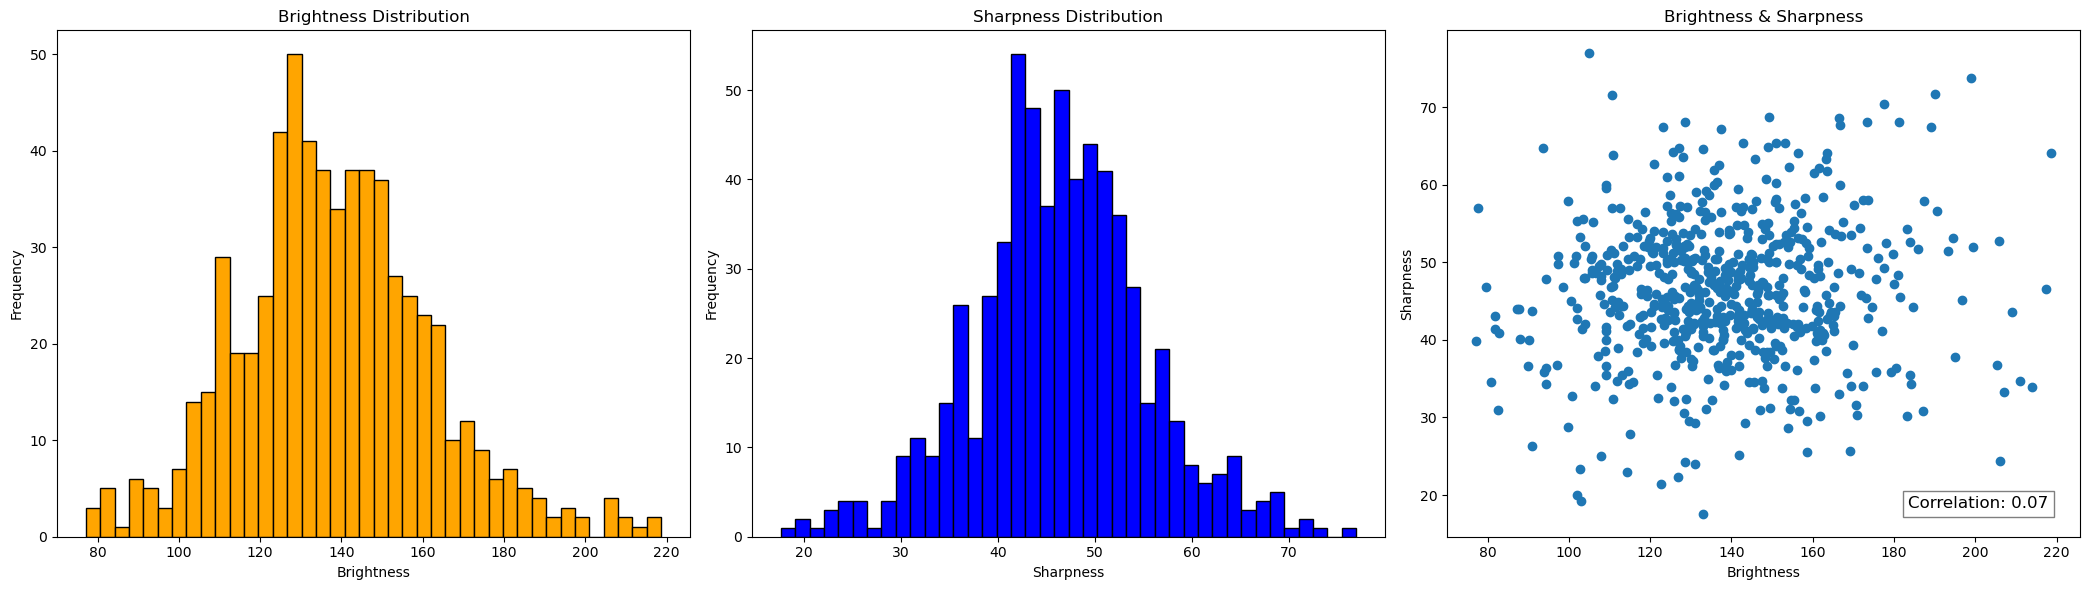

In [7]:
brightness_values = []
sharpness_values = []

for path in image_paths:
    # 이미지 읽기
    image = cv2.imread(path)
    
    # 밝기 계산
    brightness = calculate_brightness(image)
    brightness_values.append(brightness)
    
    # 선명도 계산
    sharpness = calculate_sharpness(image)
    sharpness_values.append(sharpness)

# 히스토그램 그리기
plt.figure(figsize=(21, 6))

# 밝기 히스토그램
plt.subplot(1, 3, 1)
plt.hist(brightness_values, bins=40, color='orange', edgecolor='black')
plt.title('Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')

# 선명도 히스토그램
plt.subplot(1, 3, 2)
plt.hist(sharpness_values, bins=40, color='blue', edgecolor='black')
plt.title('Sharpness Distribution')
plt.xlabel('Sharpness')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(brightness_values, sharpness_values)
plt.title('Brightness & Sharpness')
plt.xlabel('Brightness')
plt.ylabel('Sharpness')

correlation_coef = np.corrcoef(brightness_values, sharpness_values)[0, 1]

# 상관계수를 산점도의 우측 상단에 표시
plt.text(0.95, 0.05, f'Correlation: {correlation_coef:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', 
         horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

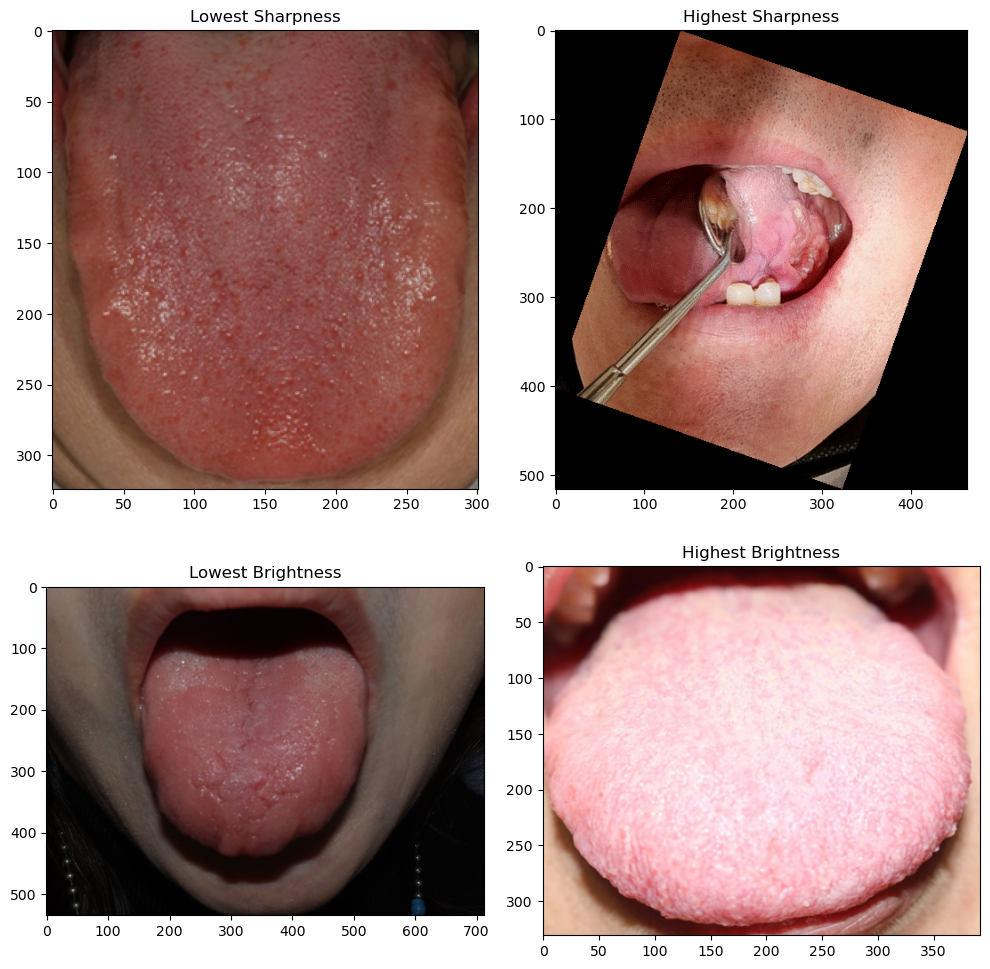

In [8]:
# 가장 낮고 높은 선명도를 가진 이미지
min_sharpness_idx = np.argmin(sharpness_values)
max_sharpness_idx = np.argmax(sharpness_values)

# 가장 낮고 높은 밝기를 가진 이미지
min_brightness_idx = np.argmin(brightness_values)
max_brightness_idx = np.argmax(brightness_values)

# 이미지 보여주기
plt.figure(figsize=(10, 10))

# 선명도가 가장 낮은 이미지
plt.subplot(2, 2, 1)
image = cv2.imread(image_paths[min_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Sharpness')

# 선명도가 가장 높은 이미지
plt.subplot(2, 2, 2)
image = cv2.imread(image_paths[max_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Sharpness')

# 밝기가 가장 낮은 이미지
plt.subplot(2, 2, 3)
image = cv2.imread(image_paths[min_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Brightness')

# 밝기가 가장 높은 이미지
plt.subplot(2, 2, 4)
image = cv2.imread(image_paths[max_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Brightness')

plt.tight_layout()
plt.show()